In [91]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
loaded_model = load_model("trained_model.h5")

In [92]:
import numpy as np
X_new_padded = np.load("my_array.npy")
data = np.load("data.npy")

In [93]:
import joblib
scaler = joblib.load('scaler.pkl')

In [94]:
X_new_padded[1007].shape
X_trial = np.expand_dims(X_new_padded[1007],axis=0)
print(X_trial.shape)

(1, 1008, 1)


In [95]:
predictions = []
temp = X_trial
for i in range(0,15):
    y_pred = loaded_model.predict(temp)
    predictions.append(y_pred[0][0])
    temp[0] = (np.append(temp[0][1:], y_pred[0][0])).reshape(1008,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [96]:
predictions = np.array(predictions)
print(predictions.shape)

(15,)


In [97]:
predictions = scaler.inverse_transform(predictions.reshape(1,-1))
print(predictions)

[[417.01385 408.23474 402.00613 397.16473 393.7142  391.59497 390.5986
  390.43536 390.80173 391.42764 392.1023  392.68433 393.09918 393.32892
  393.39722]]


In [98]:
data = data.reshape(1009)

In [99]:
data = np.append(data, predictions[0])
data = data[700:]
print(data.shape)

(324,)


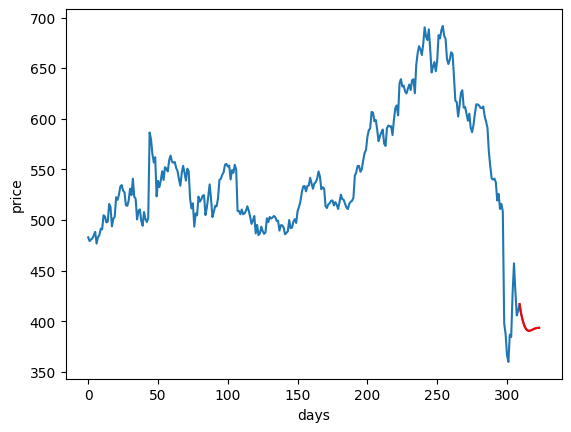

In [100]:
plt.plot(data)
plt.plot(range(len(data)-15, len(data)), data[-15:], color='red')
plt.xlabel('days')
plt.ylabel('price')
plt.show()